In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
file = r'C:\Users\vladi\Desktop\gpu_prace\data.xlsx'

In [70]:
df = pd.read_excel(file)
df['CPU_METHOD'] = df['CPU_METHOD'].astype(bool)

In [53]:
df

,TEST_SET,FPS_8bit,FPS_32bit,FPS_8bit_REAL,FPS_32bit_REAL,IDW_METHOD,CPU_UT_8bit,GPU_UT_8bit,CPU_UT_32bit,GPU_UT_32bit,CHUNK_SIZE,IMG_SIZE,CPU_METHOD,TEST_COMPUTER,TEST_SESSION
0,t1,10.0,10.0,10.0,10.0,CPU_BASIC,18.0,1.0,18.0,1.0,NaN,256,1,UNO,BASE
1,t1,20.0,20.0,20.0,20.0,CPU_THREADED,30.0,5.0,30.0,5.0,NaN,256,1,UNO,BASE
2,t1,2205.0,1715.0,1768.0,1452.0,GPU_GLOBAL_MEMORY,20.0,82.0,20.0,82.0,16x16,256,0,UNO,BASE
3,t1,2200.0,1705.0,1770.0,1450.0,GPU_TEXTURE_MEMORY,20.0,82.0,20.0,83.0,16x16,256,0,UNO,BASE
4,t1,2199.0,1650.0,1720.0,1310.0,GPU_TEXTURE_MEMORY_OPENGL,20.0,60.0,20.0,20.0,16x16,256,0,UNO,BASE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,t7,NaN,160.0,NaN,165.0,GPU_TEXTURE_MEMORY_OPENGL,NaN,NaN,NaN,NaN,16x16,1920,0,DUO,DIFF_PC
67,t8,78.0,45.0,53.0,40.0,GPU_GLOBAL_MEMORY,NaN,NaN,NaN,NaN,16x16,1920,0,DUO,DIFF_PC
68,t8,NaN,92.0,NaN,91.0,GPU_TEXTURE_MEMORY_OPENGL,NaN,NaN,NaN,NaN,16x16,1920,0,DUO,DIFF_PC
69,t9,40.0,26.0,30.0,23.0,GPU_GLOBAL_MEMORY,NaN,NaN,NaN,NaN,16x16,1920,0,DUO,DIFF_PC


In [ ]:
# add 8 bit and 32 bit version ...

#gain ?in percent ...??

#compare gpu ut / cpu ut
#compare fps 8bit vs 32bit
# compare real vs method fps

#i am not using alpha ....


Text(0.5, 1.0, 'Comparison of FPS by different test set and idw method')

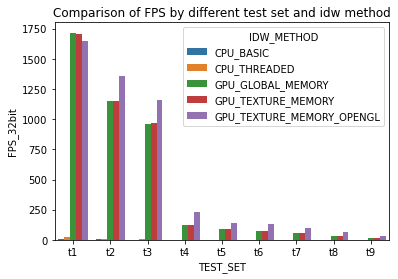

In [46]:
df_plot = df[df['TEST_SESSION'] == 'BASE']
sns.barplot(data=df_plot, y='FPS_32bit', x='TEST_SET', hue='IDW_METHOD')
plt.title('Comparison of FPS by different test set and idw method')

Text(0.5, 1.0, 'Comparison of FPS by different test set and idw method - zoom')

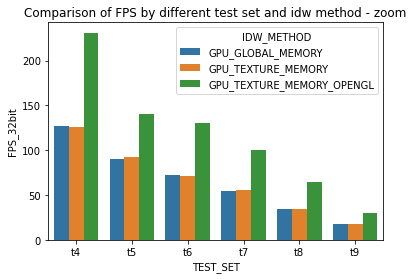

In [49]:
df_plot = df[(df['TEST_SESSION'] == 'BASE') & (df['IMG_SIZE'] > 256) & (~df['CPU_METHOD'])]
sns.barplot(data=df_plot, y='FPS_32bit', x='TEST_SET', hue='IDW_METHOD')
plt.title('Comparison of FPS by different test set and idw method - zoom')

Text(0.5, 1.0, 'Comparison of GPU utilization by different test set and idw method - zoom')

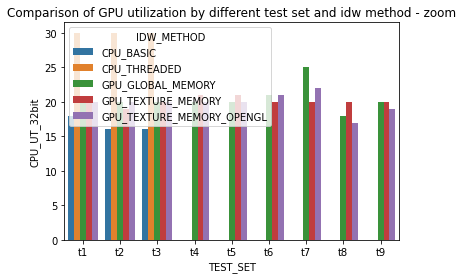

In [57]:
df_plot = df[(df['TEST_SESSION'] == 'BASE')]
sns.barplot(data=df_plot, y='CPU_UT_32bit', x='TEST_SET', hue='IDW_METHOD')
# sns.barplot(data=df_plot, y='GPU_UT_32bit', x='TEST_SET', hue='IDW_METHOD')
plt.title('Comparison of GPU utilization by different test set and idw method - zoom')

Text(0.5, 0.98, 'Comparison of GPU utliziation based on different chunk size')

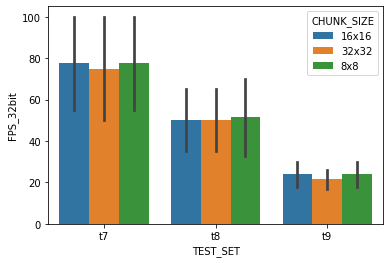

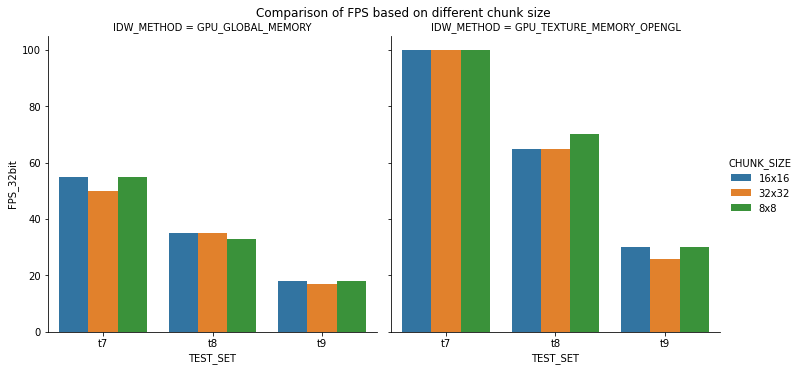

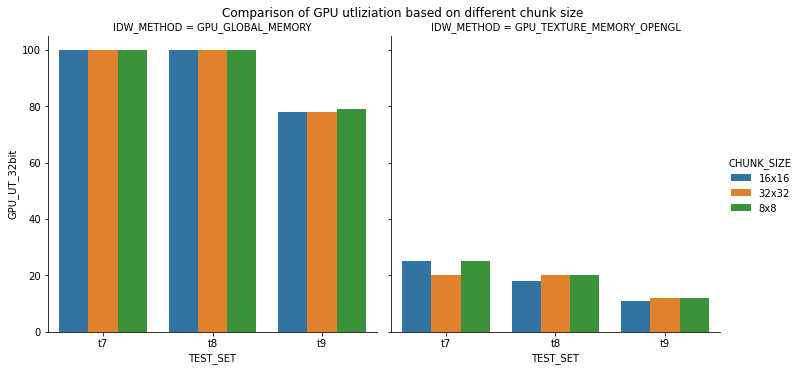

In [90]:
#different chunk size
df_plot = df[(~df['CPU_METHOD']) & (df['TEST_COMPUTER'] == 'UNO') & (df['IMG_SIZE'] == 1920) & (df['IDW_METHOD'] != 'GPU_TEXTURE_MEMORY')]
sns.barplot(data=df_plot, y='FPS_32bit', x='TEST_SET', hue='CHUNK_SIZE')

g = sns.catplot(x="TEST_SET", y="FPS_32bit", hue="CHUNK_SIZE", col="IDW_METHOD",data=df_plot, kind="bar")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of FPS based on different chunk size')

g = sns.catplot(x="TEST_SET", y="GPU_UT_32bit", hue="CHUNK_SIZE", col="IDW_METHOD",data=df_plot, kind="bar")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of GPU utliziation based on different chunk size')

In [69]:
df['CPU_METHOD'].astype(bool)

0      True
1      True
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Name: CPU_METHOD, Length: 71, dtype: bool